In [1]:
import pandas as pd
import re
import numpy as np
import json
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
RE_SPACE = re.compile(r'[\s]+')

In [3]:
def preprocess(test_name):
    path = "../test_data/"+test_name
    df = pd.read_csv(path+"/" + test_name + "_stats_history.csv")
    columns = ['Timestamp', 'Name', 'Requests/s', 'Total Average Response Time']
    df = df[columns]
    df = df[df['Total Average Response Time'] >0]
    df = df[df['Name'] != "Aggregated"]
    df['Timestamp'] = df['Timestamp']-df['Timestamp'].iloc[0]
    df.set_index('Timestamp', inplace=True)
    
    groupd = df.groupby('Name')
    diff = groupd.get_group('/ping')['Total Average Response Time']
    
    d_native = groupd.get_group('/actions/fib_cn/invoke').copy()
    d_c = groupd.get_group('/actions/fib_c/invoke').copy()
    d_ping = groupd.get_group('/ping').copy()
    
    d_native['Total Average Response Time'] = d_native['Total Average Response Time']-diff
    d_c['Total Average Response Time'] = d_c['Total Average Response Time']-diff
    
    d_c['Requests/s'] = d_c['Requests/s']*2/5 + d_native['Requests/s']*2/5
    
    d_native = d_native[d_native['Total Average Response Time'] >0]
    d_c = d_c[d_c['Total Average Response Time'] >0]
    
    d_native.dropna(inplace=True)
    d_c.dropna(inplace=True)
    
    d_native = d_native[:300]
    d_c = d_c[:300]
    
    return d_native, d_c, d_ping

In [4]:
tests = {
    "test1": "Small workload, 1rps",
    "test2": "Small workload, 10rps",
    "test3": "Medium workload, 1rps",
    "test5": "Large workload, 1req per 20s"
}

In [5]:
test = "test2"

In [6]:
title = tests[test]

In [7]:
d_native, d_c, d_ping = preprocess(test)

In [8]:
d_c

,Name,Requests/s,Total Average Response Time
Timestamp,,,
0,/actions/fib_c/invoke,0.00,7.566630
1,/actions/fib_c/invoke,0.00,24.300713
2,/actions/fib_c/invoke,0.00,63.834424
3,/actions/fib_c/invoke,8.00,39.879840
4,/actions/fib_c/invoke,6.60,20.469200
...,...,...,...
298,/actions/fib_c/invoke,7.20,12.819448
299,/actions/fib_c/invoke,7.24,12.841834
300,/actions/fib_c/invoke,7.20,12.830171


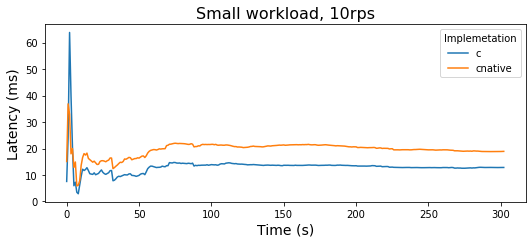

In [9]:
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

axs = plt.plot(d_c['Total Average Response Time'], label='c')
axs = plt.plot(d_native['Total Average Response Time'], label='cnative')
# axs = plt.plot(d_ping['Total Average Response Time'], label='ping')
# ax1 = d_c['Requests/s'].plot(label='requests/sec')

plt.legend(title='Implemetation')

#add axes labels and a title
plt.ylabel('Latency (ms)', fontsize=14)
plt.xlabel('Time (s)', fontsize=14)
plt.title(title, fontsize=16)
plt.savefig('./data/' + title + '1.png', dpi=300)
# plt.ylim([0, 8500])
#display plot
plt.show()

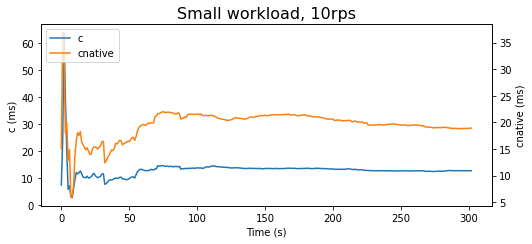

In [10]:
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

# df.A.plot(color='red', label='Count')
# ax2 = df.B.plot(color='yellow', secondary_y=True, label='Sum')

ax1 = d_c['Total Average Response Time'].plot(label='c')
ax2 = d_native['Total Average Response Time'].plot(secondary_y=True, label='cnative')

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()

ax1.set_ylabel(ylabel='c (ms)')
ax2.set_ylabel(ylabel='cnative (ms)')
ax1.set_xlabel(xlabel='Time (s)')

plt.title(title, fontsize=16)
plt.legend(h1+h2, l1+l2, loc=2)
plt.savefig('./data/' + title + '2.png', dpi=300)
plt.show()

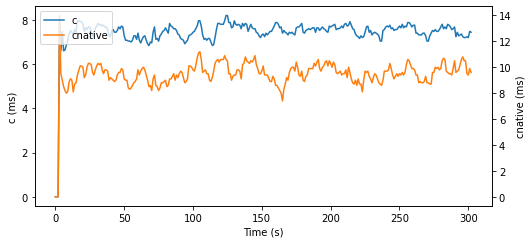

In [11]:
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

# df.A.plot(color='red', label='Count')
# ax2 = df.B.plot(color='yellow', secondary_y=True, label='Sum')

ax1 = d_c['Requests/s'].plot(label='c')
ax2 = d_native['Requests/s'].plot(secondary_y=True, label='cnative')

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()

ax1.set_ylabel(ylabel='c (ms)')
ax2.set_ylabel(ylabel='cnative (ms)')
ax1.set_xlabel(xlabel='Time (s)')

plt.legend(h1+h2, l1+l2, loc=2)
plt.savefig('./data/' + title + '3.png', dpi=300)

plt.show()